## Indexing: Preparing Your Documents for LLMs

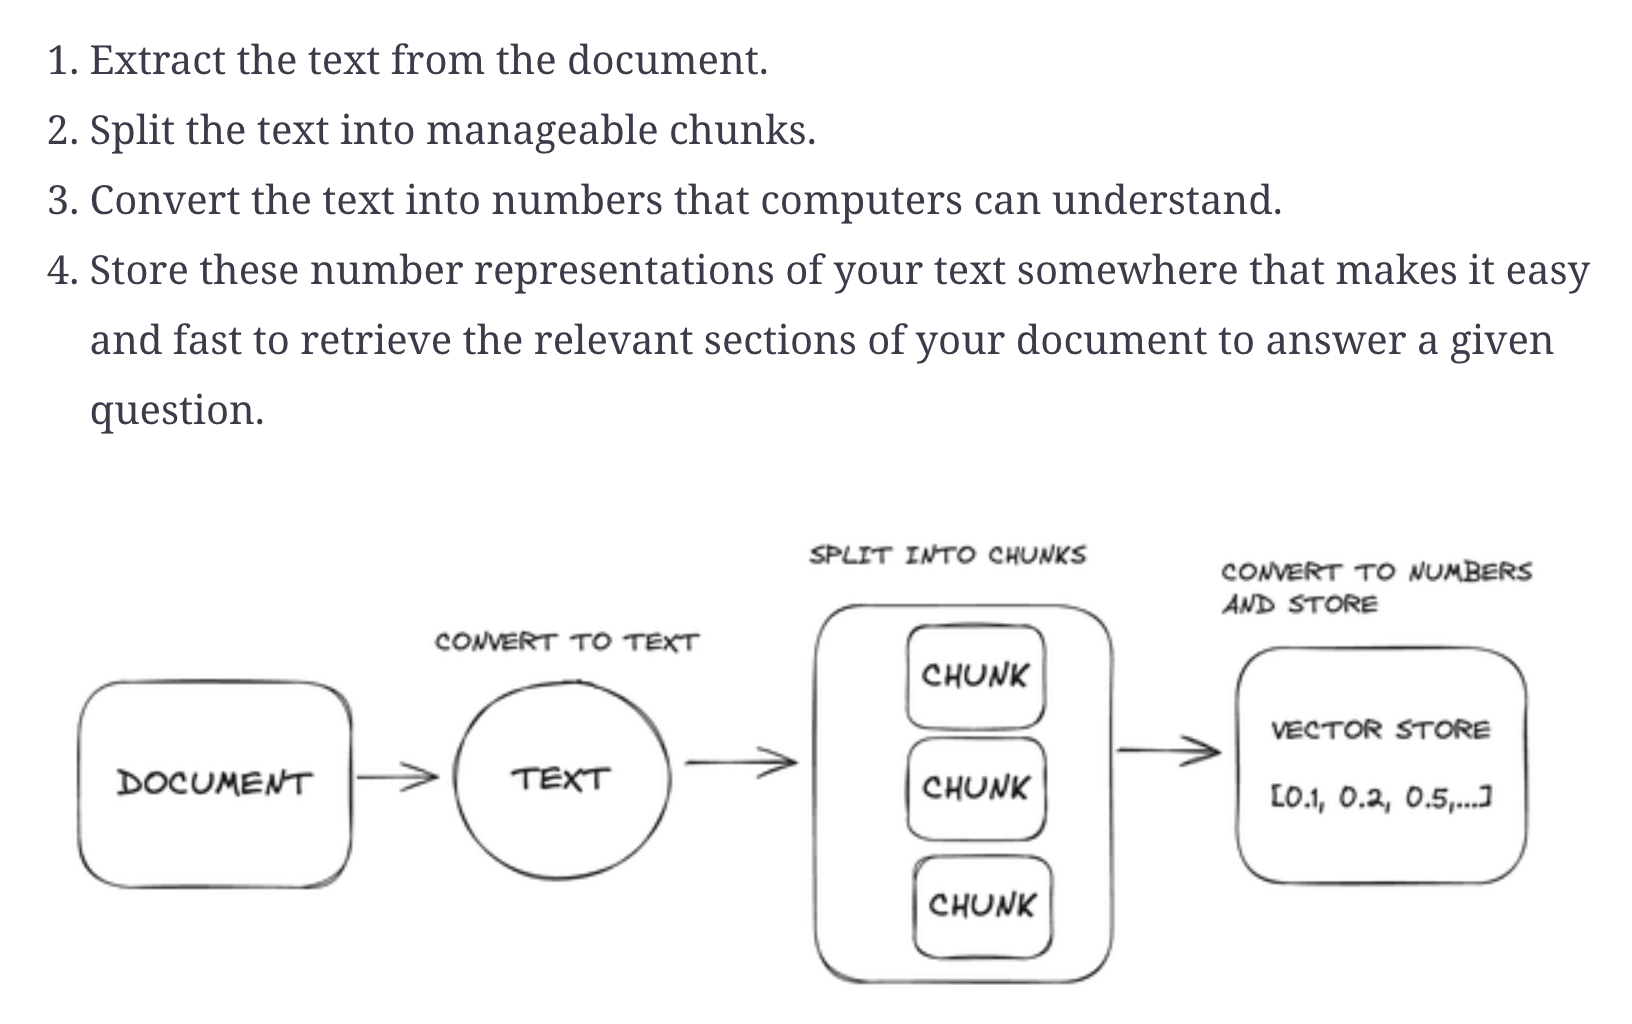

## Converting Your Documents into Text


In [19]:
from langchain_community.document_loaders import TextLoader

loader = TextLoader("data.txt")
loader.load()

[Document(metadata={'source': 'data.txt'}, page_content='Welcome to our sample data file!\nThis file contains various types of information.\nHere are some random facts:\n\n1. The Great Wall of China is visible from space.\n2. Honey never spoils.\n3. The shortest war in history lasted 38 minutes.\n\nNow, let\'s add some numbers:\n- 42 is often called the "Answer to the Ultimate Question of Life, the Universe, and Everything"\n- Pi (π) is approximately 3.14159\n\nHere\'s a famous quote:\n"To be or not to be, that is the question." - William Shakespeare\n\nThank you for reading this sample file!\nEnd of data.')]

In [24]:
from langchain_community.document_loaders import WebBaseLoader

loader = WebBaseLoader("https://www.langchain.com/")
loader.load()


[Document(metadata={'source': 'https://www.langchain.com/', 'title': 'LangChain', 'description': 'LangChain’s suite of products supports developers along each step of their development journey.', 'language': 'en'}, page_content="LangChain\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nProducts\n\nLangChainLangSmithLangGraphMethods\n\nRetrievalAgentsEvaluationResources\n\nBlogCase StudiesUse Case InspirationEventsExpertsChangelogDocs\n\nPythonLangChainLangSmithLangGraphJavaScriptLangChainLangSmithLangGraphCompany\n\nAboutCareersPricingGet a demoSign upLangChain’s suite of products supports developers along each step of the LLM application lifecycle.Applications that can reason. Powered by LangChain.Get a demoSign up for free\n\nFrom startups to global enterprises, ambitious builders choose LangChain products.BuildLangChain is a framework to build with LLMs by chaining interoperable components. LangGraph is the framework for building controllable agentic workflows.RunDeploy your LLM appl

<div style="background-color:#f0f8ff; padding: 15px; border-radius: 10px; border-left: 6px solid #4682B4;">
  <h4 style="color:#4682B4;"><b>💡 TIP</b></h4>
  <p><b>LLMs and Embedding models</b> are designed with a hard limit on the size of input and output text they can handle. This limit is usually called the <b>context window</b> and applies to the combination of input and output. For example, if the context window is 100 units and your input measures 90, the output can be at most 10 units long.</p>

  <p>Context windows are usually measured in <b>tokens</b>, such as 8,192 tokens. Tokens represent text as numbers, with each token covering roughly 3-4 characters of English text.</p>
</div>


## Splitting Your Text Into Chunks


<div style="background-color:#f0f8ff; padding: 15px; border-radius: 10px; border-left: 6px solid #4682B4;">
  <p>At first glance, it may seem straightforward to split a large body of text into chunks, but keeping <b>semantically related</b> chunks together is complex. To simplify this, LangChain provides <b>RecursiveCharacterTextSplitter</b>, which works as follows:</p>
  
  <ol>
    <li>Take a list of separators, in order of importance. By default, these are:
      <ol>
        <li>The paragraph separator: <code>\n\n</code></li>
        <li>The line separator: <code>\n</code></li>
        <li>The word separator: space character</li>
      </ol>
    </li>
    <li>Respect the given chunk size, for instance, 1,000 characters, by splitting paragraphs first.</li>
    <li>For any paragraph longer than the desired chunk size, split by the next separator, until chunks meet the desired length or there are no separators left.</li>
    <li>Emit each chunk as a <code>Document</code>, with metadata of the original document and its position.</li>
  </ol>
  
  <p>LangChain's text splitters handle various data formats like HTML, code, JSON, Markdown, and text.</p>
</div>


In [31]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import TextLoader

loader = TextLoader("data.txt")
docs = loader.load()

splitter = RecursiveCharacterTextSplitter(chunk_size=1000, 
                                               chunk_overlap=200)

splitter_doc = splitter.split_documents(docs)
splitter_doc

[Document(metadata={'source': 'data.txt'}, page_content='Welcome to our sample data file!\nThis file contains various types of information.\nHere are some random facts:\n\n1. The Great Wall of China is visible from space.\n2. Honey never spoils.\n3. The shortest war in history lasted 38 minutes.\n\nNow, let\'s add some numbers:\n- 42 is often called the "Answer to the Ultimate Question of Life, the Universe, and Everything"\n- Pi (π) is approximately 3.14159\n\nHere\'s a famous quote:\n"To be or not to be, that is the question." - William Shakespeare\n\nThank you for reading this sample file!\nEnd of data.')]

<div style="background-color:#f0f8ff; padding: 15px; border-radius: 10px; border-left: 6px solid #4682B4;">
  <p><b>RecursiveCharacterTextSplitter</b> can also be used to split code languages and Markdown into semantic chunks. This is achieved by using keywords specific to each language as separators, ensuring, for example, that the body of each function stays in the same chunk, rather than being split.</p>
  
  <p>Since programming languages have more structure than written text, there’s typically less need to use overlapping chunks. LangChain provides separators for many popular languages like Python, JS, Markdown, HTML, and more.</p>
  
  <p>Let’s see an example, first in Python:</p>
</div>


In [37]:
from langchain_text_splitters import (Language, RecursiveCharacterTextSplitter)
PYTHON_CODE = """
def add(a, b):
    return a + b

def subtract(a, b):
    return a - b

# Call the add function
result = add(3, 4)
print(result)

"""

splitter = RecursiveCharacterTextSplitter.from_language(language=Language.PYTHON, 
                                                       chunk_size=50, 
                                                       chunk_overlap=0)

python_docs = splitter.create_documents([PYTHON_CODE])
python_docs

[Document(page_content='def add(a, b):\n    return a + b'),
 Document(page_content='def subtract(a, b):\n    return a - b'),
 Document(page_content='# Call the add function\nresult = add(3, 4)'),
 Document(page_content='print(result)')]

In [5]:
from langchain_aws import ChatBedrock

bedrock = ChatBedrock(model_id="anthropic.claude-3-sonnet-20240229-v1:0", 
                      model_kwargs=dict(temperature=0, max_tokens=500))

## Generating Text Embeddings


In [40]:
from langchain_aws import BedrockEmbeddings

bedrock_embeddings = BedrockEmbeddings(model_id="amazon.titan-embed-text-v1")

embeddings = bedrock_embeddings.embed_query("What is the meaning of life?")

len(embeddings)

1536

In [44]:
embeddings[:10]

[0.41992188,
 -0.7265625,
 -0.080078125,
 0.41210938,
 -0.056640625,
 0.37890625,
 -0.059570312,
 -0.0012969971,
 -0.375,
 0.296875]

In [46]:
embeddings = bedrock_embeddings.embed_documents([
                                        "Hi there!",
                                        "Oh, hello!",
                                        "What's your name?",
                                        "My friends call me World",
                                        "Hello World!"
                                    ])

len(embeddings)

5

<div style="background-color:#f0f8ff; padding: 15px; border-radius: 10px; border-left: 6px solid #4682B4;">
  <p>Now let’s see an end-to-end example using the three capabilities we’ve seen so far:</p>
  
  <ul>
    <li><b>Document loaders:</b> To convert any document to plain text</li>
    <li><b>Text splitters:</b> To split each large document into many smaller ones</li>
    <li><b>Embeddings models:</b> To create a numeric representation of the meaning of each split</li>
  </ul>
</div>


In [49]:
from langchain.document_loaders import TextLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_aws import BedrockEmbeddings

# Load the document
loader = TextLoader('data.txt')
documents = loader.load()

# Split the document into smaller chunks
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=20)
split_docs = text_splitter.split_documents(documents)

# Embedding model 
bedrock_embeddings = BedrockEmbeddings(model_id="amazon.titan-embed-text-v1")

# Generate embeddings for each chunk
embeddings = bedrock_embeddings.embed_documents([doc.page_content for doc in split_docs])

# Display the length of the embeddings list
len(embeddings[0])


1536

## Storing Embeddings in a Vector Store
